In [31]:
'0x000000fee13a103A10D593b9AE06b3e05F2E7E1c'.lower()

'0x000000fee13a103a10d593b9ae06b3e05f2e7e1c'

In [44]:
import os
import dask.dataframe as dd

# Chemin du dossier contenant les fichiers .csv
dossier = '../../../../erc20_balance_export/2024'

# Lister tous les fichiers dans le dossier
fichiers = os.listdir(dossier)

# Filtrer les fichiers pour ne garder que ceux avec l'extension .csv
fichiers_csv = [f for f in fichiers if f.endswith('.csv')]

# Initialiser une liste pour stocker les DataFrames Dask
dataframes = []

# Par exemple, 50MB par partition
blocksize = 50 * 1024 * 1024  # 50MB

# Boucler sur chaque fichier .csv et lire son contenu avec Dask
for fichier_csv in fichiers_csv:
    chemin_complet = os.path.join(dossier, fichier_csv)
    df = dd.read_csv(chemin_complet, blocksize=blocksize)
    dataframes.append(df)

# Combiner tous les DataFrames Dask en un seul DataFrame Dask
df_combine = dd.concat(dataframes)

# Afficher les premières lignes du DataFrame Dask
print(df_combine.head())


    timestamp                              wallet_address  \
0  2024-01-14  0xfb19ffd1ff9316b7f5bba076ef4b78e4bbedf4e1   
1  2024-01-14  0xf24135b3b4b43ba65b6624387ba6359b1f5d7ce3   
2  2024-01-14  0x9d2c4cda3e174fa03a27c51c6bf1bc4a0072538b   
3  2024-01-14  0x64dc5abfe2147e1e361b64bf7043867856fe548e   
4  2024-01-14  0x608f641b55444d7197d636a5cb9053d1ce783bb0   

                                token_address       balance  
0  0xd26114cd6ee289accf82350c8d8487fedb8a0c07  1.051167e+10  
1  0xd26114cd6ee289accf82350c8d8487fedb8a0c07  1.021925e+10  
2  0xda47862a83dac0c112ba89c6abc2159b95afd71c  3.024594e+09  
3  0xe012baf811cf9c05c408e879c399960d1f305903 -1.166460e-09  
4  0xcd24ba0e3364233ee9301c1d608a14753c8739c5 -2.687700e+09  


In [28]:
test_ts.set_index('timestamp', inplace=True)
date_range = pd.date_range(start='2024-01-01', end='2024-04-01')
test_ts = test_ts.reindex(date_range)
test_ts['balance'] = test_ts['balance'].ffill()
test_ts = test_ts.reset_index()
test_ts.rename(columns={'index': 'timestamp'}, inplace=True)
test_ts

,timestamp,balance
0,2024-01-01,-1.559025e+10
1,2024-01-02,6.186213e+08
2,2024-01-03,-8.100869e+09
3,2024-01-04,1.697219e+10
4,2024-01-05,3.305615e+10
...,...,...
87,2024-03-28,-8.330456e+09
88,2024-03-29,2.694402e+10
89,2024-03-30,2.952772e+10
90,2024-03-31,2.762449e+10


In [1]:
'0xdf09a216Fac5ADC3e640Db418C0b956076509503'.lower()

'0xdf09a216fac5adc3e640db418c0b956076509503'

In [109]:
import requests
address = '0xe598c65f960a8c39b539f31cabf2c28f1567fd54'
url = f'https://walletscan-api-7f80b4b1818a.herokuapp.com/wallet-info/{address.lower()}'

response = requests.get(url)

if response.status_code == 200:
    wallet_info = response.json()
    wallet_data = pd.DataFrame(wallet_info)
    display(wallet_data)
else:
    print(f"Error: {response.status_code}")

,timestamp,wallet_address,token_address,balance
0,2024-06-09,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0xca3a43be02b0266cf66e340ed3811c1ecfc06332,1.085215e+03
1,2024-06-08,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0x87847ed8ccfe56b38c9f429531e8ea3c505b608c,3.574068e+14
2,2024-06-07,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0x03e16eecf52668c10974d248005b196a9c864cf8,1.000000e-10
3,2024-06-05,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0xb30240d48c05a4b950c470e2d6aefc9117a50624,0.000000e+00
4,2024-06-04,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0x82a605d6d9114f4ad6d5ee461027477eeed31e34,4.084877e+10
...,...,...,...,...
231,2020-03-20,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0x22a39c2dd54b71ac884657bb3e37308abe2d02e1,1.157921e+45
232,2020-03-15,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0x3a4a0d5b8dfacd651ee28ed4ffebf91500345489,8.000000e+04
233,2020-02-02,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0x11cbb069aa7f8fbf00c62206d1239e11dc62624e,8.888800e+04
234,2019-11-06,0xe598c65f960a8c39b539f31cabf2c28f1567fd54,0xb7fbe91752dd926a5ea103f1b2e8b6fd2cee4d91,5.000000e-09


In [78]:
KEY = "--"
from nixtla import NixtlaClient
nixtla_client = NixtlaClient(
    api_key = KEY
)
nixtla_client.validate_api_key()


INFO:nixtla.nixtla_client:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io sharing this response and ID: YARU8RAPYX


True

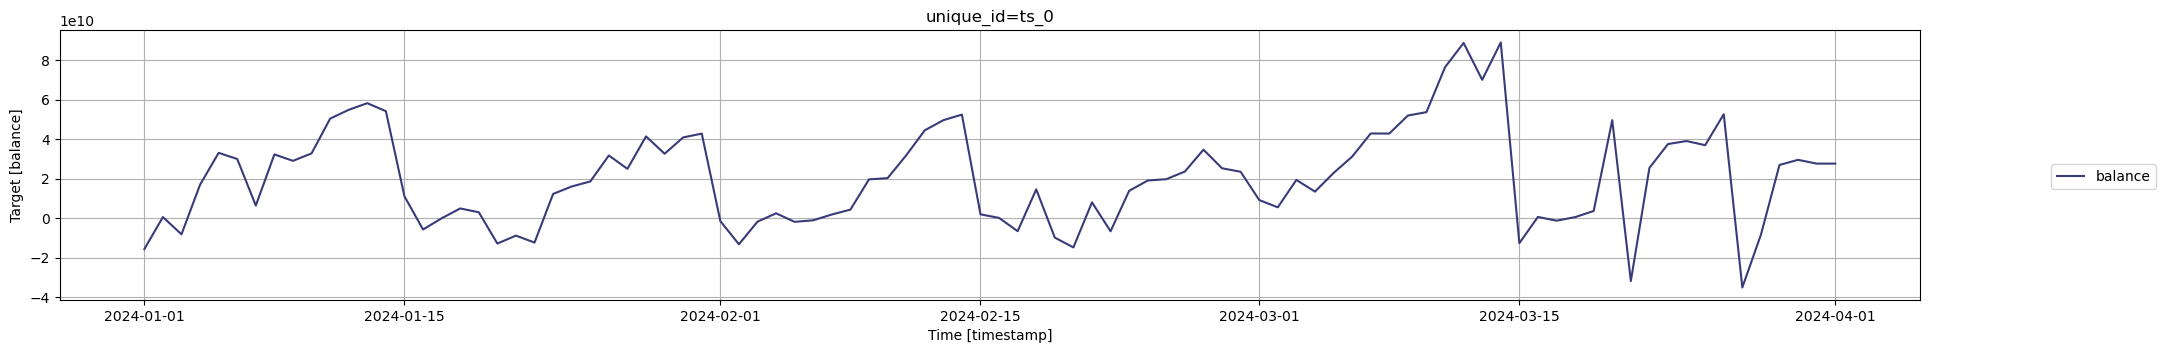

In [107]:
nixtla_client.plot(test_ts, time_col='timestamp', target_col='balance')


In [97]:
timegpt_fcst_df = nixtla_client.forecast(df=test, 
                                         h=12, 
                                         freq='D', 
                                         time_col='timestamp', 
                                         target_col='balance',
                                         level=[80, 90],
                                         add_history=True,
                                         )
timegpt_fcst_df.head()


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


,timestamp,TimeGPT,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-80,TimeGPT-hi-90
0,2024-01-30,54338531328,1.156033e+10,-5.666980e+08,9.711673e+10,1.092438e+11
1,2024-01-31,54546829312,1.176863e+10,-3.584000e+08,9.732503e+10,1.094521e+11
2,2024-02-01,54929997824,1.215179e+10,2.476849e+07,9.770820e+10,1.098352e+11
3,2024-02-02,57269784576,1.449158e+10,2.364555e+09,1.000480e+11,1.121750e+11
4,2024-02-03,57241587712,1.446338e+10,2.336358e+09,1.000198e+11,1.121468e+11


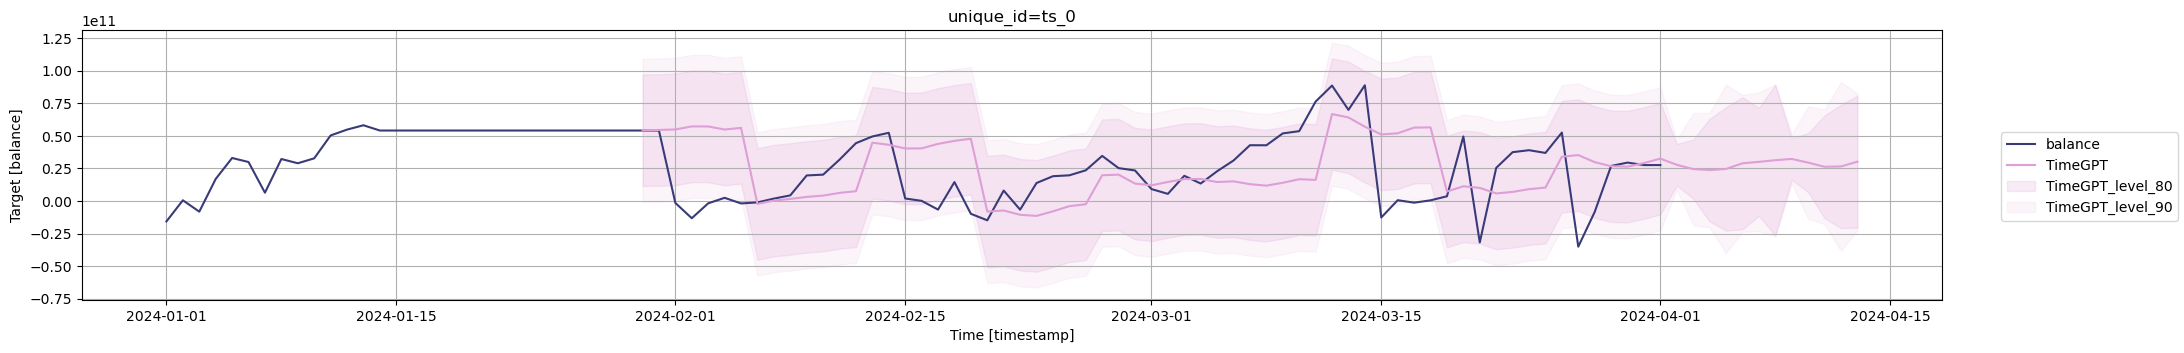

In [98]:
nixtla_client.plot(test, 
                   timegpt_fcst_df, 
                   time_col='timestamp', 
                   target_col='balance',
                   level=[80, 90],)


# get wallet info

In [52]:
response = get_wallet_info('0x3b57d4be6aaf6a7340033456e6b9a4a5e64edbb2')

In [98]:
df = pd.DataFrame(response['wallet_data'])

In [113]:
first_tx = pd.to_datetime(df['timestamp'].min()).year
last_tx_year = pd.to_datetime(df['timestamp'].max()).year
last_tx_month = pd.to_datetime(df['timestamp'].max()).month
nb_unique_tokens = df["token_address"].nunique()
nb_tx = df['timestamp'].count()
first_tx, last_tx_month, last_tx_year, nb_unique_tokens, nb_tx


(2022, 6, 2024, 66, 363)

In [114]:
token_info = token_dict.loc[token_dict['address'] == "0xf34b1db61aca1a371fe97bad2606c9f534fb9d7d".lower()]

'Arbismart Token'

In [128]:
(f"{token_info.iloc[0]['name']} ({token_info.iloc[0]['symbol']})")

'Arbismart Token (RBIS)'

In [100]:
df.drop("wallet_address", axis=1, inplace=True)
df

,timestamp,token_address,balance
0,2024-06-09,0x09970aec766b6f3223aca9111555e99dc50ff13a,1.329000e+08
1,2024-06-09,0xf3db5fa2c66b7af3eb0c0b782510816cbe4813b8,7.160000e-07
2,2024-06-08,0xc6d1f1d5a46de07e73091f1c8793293b203f01a1,3.084192e+14
3,2024-06-07,0x8400d94a5cb0fa0d041a3788e395285d61c9ee5e,0.000000e+00
4,2024-06-01,0xaaaebe6fe48e54f431b0c390cfaf0b017d09d42d,0.000000e+00
...,...,...,...
358,2022-09-07,0x4fd5b9b5dcc9a5d5931d007ba4ae573e760d9b64,6.152000e+07
359,2022-09-06,0x4156d3342d5c385a87d264f90653733592000581,3.937000e-03
360,2022-09-06,0x0c37bcf456bc661c14d596683325623076d7e283,1.833300e+10
361,2022-09-05,0x4156d3342d5c385a87d264f90653733592000581,2.423000e-03


INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


,timestamp,TimeGPT,TimeGPT-lo-80,TimeGPT-lo-90,TimeGPT-hi-80,TimeGPT-hi-90
0,2024-01-30,1.339690e-02,-6.984043e+06,-8.963923e+06,6.984043e+06,8.963923e+06
1,2024-01-31,1.853471e-02,-6.984043e+06,-8.963923e+06,6.984043e+06,8.963923e+06
2,2024-02-01,2.489477e-02,-6.984043e+06,-8.963923e+06,6.984043e+06,8.963923e+06
3,2024-02-02,2.483144e-02,-6.984043e+06,-8.963923e+06,6.984043e+06,8.963923e+06
4,2024-02-03,2.713930e-02,-6.984043e+06,-8.963923e+06,6.984043e+06,8.963923e+06
...,...,...,...,...,...,...
7,2024-04-09,2.080000e+07,2.020965e+07,1.889570e+07,2.139035e+07,2.270430e+07
8,2024-04-10,2.080000e+07,1.980644e+07,1.736426e+07,2.179356e+07,2.423574e+07
9,2024-04-11,2.080000e+07,1.940970e+07,1.643444e+07,2.219030e+07,2.516556e+07
10,2024-04-12,2.080000e+07,1.900296e+07,1.555775e+07,2.259704e+07,2.604225e+07


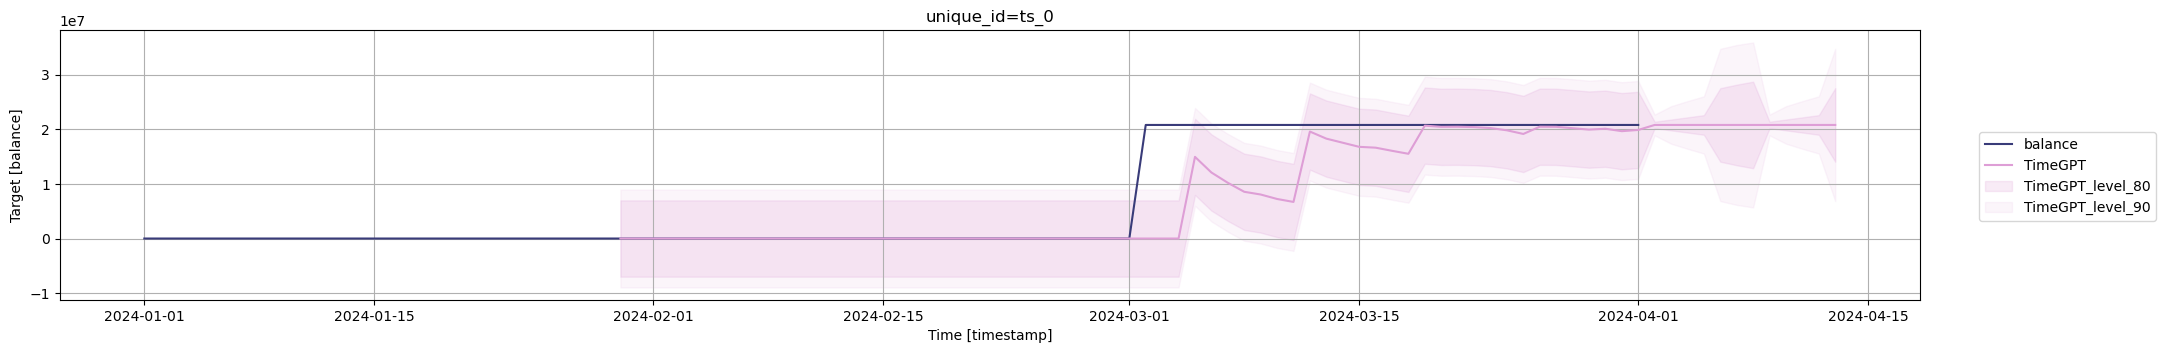

In [85]:
def expend_wallet_history(balance_history):
    balance_history['timestamp'] = pd.to_datetime(balance_history['timestamp'])
    dates = pd.date_range(start='2024-01-01', end='2024-04-01', freq='D')
    df = pd.DataFrame(index=dates)
    df = df.merge(token_only, how='left', left_index=True, right_on='timestamp')
    df = df.set_index('timestamp').reindex(dates)
    df['balance'] = df['balance'].ffill().fillna(0)
    df = df.reset_index()
    df = df.rename(columns={'index': 'timestamp'})
    return df

if response['status_code'] == 200:
    df = pd.DataFrame(response['wallet_data'])
    df.drop("wallet_address", axis=1, inplace=True)
    #### HERE


    #token_only = df.loc[df['token_address']==st.query_params.token.lower()].copy()
    token_only = df.loc[df['token_address']=='0x0c37bcf456bc661c14d596683325623076d7e283'.lower()].copy()
    token_only.drop("token_address", axis=1, inplace=True)
    token_only['balance'] = (token_only['balance']/10000).round()
    expended_balance = expend_wallet_history(token_only)

timegpt_fcst_df = nixtla_client.forecast(df=expended_balance, 
                                         h=12, 
                                         freq='D', 
                                         time_col='timestamp', 
                                         target_col='balance',
                                         level=[80, 90],
                                         add_history=True,
                                         )
display(timegpt_fcst_df)

nixtla_client.plot(expended_balance, 
                   timegpt_fcst_df, 
                   time_col='timestamp', 
                   target_col='balance',
                   level=[80, 90],)

In [93]:
import plotly.graph_objects as go
# Create a plotly figure
def display_plot(df,forecast_df,level):
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=df['timestamp'], y=df['balance'], mode='lines', 
            line=dict(color='blue'), name='Actual Value'
        ),
    )
    fig.add_trace(
        go.Scatter(
            x=forecast_df['timestamp'], y=forecast_df['TimeGPT'], mode='lines', 
            line=dict(color='red'), name='Forecast',
        ),
    )
    lo = forecast_df[f'TimeGPT-lo-{level}'].to_list()
    hi = forecast_df[f'TimeGPT-hi-{level}'].to_list()
    ds = forecast_df['timestamp'].to_list()
    fig.add_trace(
        go.Scatter(
            x=ds + ds[::-1],  # X coordinates for the filled area.
            y=hi + lo[::-1],  # Y coordinates for the filled area.
            fill='toself',  # The area under the trace is filled.
            fillcolor='rgba(0,176,246,0.2)',  # The fill color.
            line_color='rgba(255,255,255,0)',  # The line color.
            #showlegend=False,  # The trace is not added to the legend.
            name='Prediction Interval',
        )
    )
    fig.update_layout(
        #title='Time Series ',#+selected_uid,
        #xaxis_title='Date',
        #yaxis_title='Value',
        margin=dict(l=0, r=0, t=0, b=0),  # Suppression des marges
        yaxis=dict(range=[0, None]),
        legend=dict(
        orientation="h",  # Orientation horizontale
        yanchor="bottom", # Ancrage en bas
        y=1,              # Positionnement au-dessus de la figure
        xanchor="center", # Ancrage au centre
        x=0.5             # Centré horizontalement
    )
    )
    # Show the plot
    fig.show()
    #st.plotly_chart(fig)
display_plot(expended_balance,timegpt_fcst_df,90)